In [16]:
# !pip install geopandas
!pip install descartes
!pip install shapely.geometry

ERROR: Could not find a version that satisfies the requirement shapely.geometry (from versions: none)
ERROR: No matching distribution found for shapely.geometry


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import descartes
# from shapely.geometry import Point, Polygon
from datetime import datetime

%matplotlib inline

In [ ]:
import geopandas as gpd

In [21]:
# root = "/content/drive/My Drive/Colab Notebooks"
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_NYC.csv")
print('\nNo. of Records:', df.shape[0])
print('No. of Attributes:', df.shape[1])
df.head()

C:\Users\Zohair\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



No. of Records: 1750704
No. of Attributes: 29


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,07/04/2018,12:20,NaN,NaN,40.723747,-74.00612,"(40.723747, -74.00612)",VARICK STREET,NaN,NaN,...,Aggressive Driving/Road Rage,NaN,NaN,NaN,3934661,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,07/23/2018,16:30,NaN,NaN,40.822628,-73.94351,"(40.822628, -73.94351)",WEST 144 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3947774,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,07/13/2018,15:40,BROOKLYN,11212,40.665146,-73.90230,"(40.665146, -73.9023)",NaN,NaN,455 DUMONT AVENUE,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3943533,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
3,07/25/2018,11:30,BROOKLYN,11211,40.713043,-73.94467,"(40.713043, -73.94467)",NaN,NaN,235 AINSLIE STREET,...,NaN,NaN,NaN,NaN,3949035,Sedan,NaN,NaN,NaN,NaN
4,07/05/2018,20:32,BROOKLYN,11207,40.658577,-73.89063,"(40.658577, -73.89063)",PENNSYLVANIA AVENUE,LINDEN BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3936055,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


## **Data Cleaning**

Setting *Collision ID* as the Index.

In [26]:
df.set_index(keys='COLLISION_ID', inplace=True)

KeyError: "None of ['COLLISION_ID'] are in the columns"

Checking for missing values.

In [ ]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           537299
ZIP CODE                          537510
LATITUDE                          207904
LONGITUDE                         207904
LOCATION                          207904
ON STREET NAME                    351938
CROSS STREET NAME                 613287
OFF STREET NAME                  1491134
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4907
CONTRIBUTING FACTOR VEHICLE 2     246619
CONTRIBUTING FACTOR VEHICLE 3    1633784
CONTRIBUTING FACTOR VEHICLE 4    1725617
CONTRIBUTING FACTOR VEHICLE 5    1744162
VEHICLE TYPE CODE 1                 9152
VEHICLE TYPE COD

Filling missing values.

In [ ]:
# Using location to fill missing borough names
temp = df.sort_values(by='LOCATION') #new dataframe with rows sorted by location
temp = temp[['BOROUGH', 'ZIP CODE']].fillna(method='ffill') #forward filsl BOROUGH and ZIP CODE
df.fillna(temp, inplace=True) #assign to original dataframe

Replacing NaN values with 'Unspecified'.



In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].fillna('Unspecified')

df['ON STREET NAME'] = df['ON STREET NAME'].fillna('Unspecified')
df['OFF STREET NAME'] = df['OFF STREET NAME'].fillna('Unspecified')
df['CROSS STREET NAME'] = df['CROSS STREET NAME'].fillna('Unspecified')

df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].fillna('Unspecified')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].fillna('Unspecified')
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].fillna('Unspecified')
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].fillna('Unspecified')
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].fillna('Unspecified')

Deleting remaining rows with missing values.

In [ ]:
#deleting rows with missing number of persons killed/injured
df = df[df['NUMBER OF PERSONS INJURED'].notna()]
df = df[df['NUMBER OF PERSONS KILLED'].notna()]

#deleting rows with missing location
df = df[df['LOCATION'].notna()]

Checking again for missing values.

In [ ]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
ON STREET NAME                   0
CROSS STREET NAME                0
OFF STREET NAME                  0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64

Deleting duplicate records.

In [ ]:
df.drop_duplicates(inplace=True)
print('\nNo. of Records:', df.shape[0])
print('No. of Attributes:', df.shape[1])


No. of Records: 1541487
No. of Attributes: 28


Cleaning the Vehicle columns:

In [ ]:
# Upon studying, noticed vehicle names have different cases e.g. BUS and Bus. Converting all to lowercase for consistency
for col in df.columns.values:
  if "CODE" in col:
    df[col] = df[col].str.lower()

## **Visualising Number of Accidents Recorded in each Year**

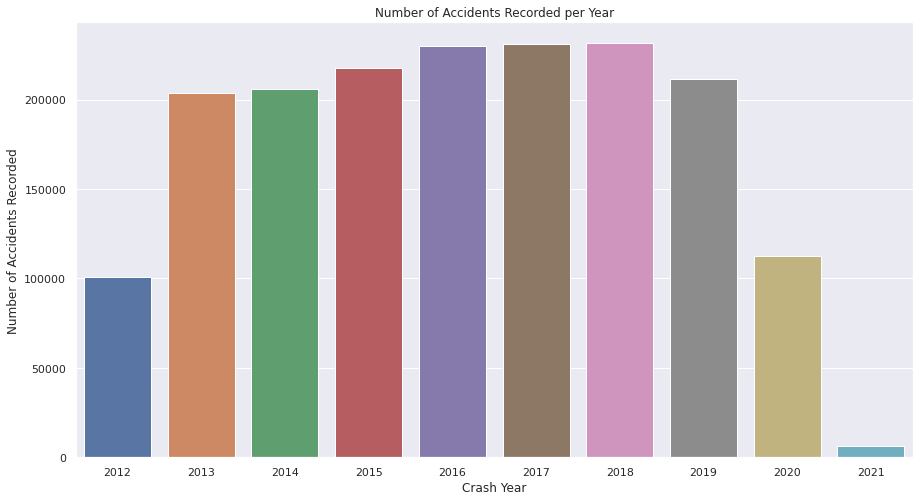

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
groupByYear_df = df.groupby(df['CRASH DATE'].dt.year).count().rename(columns={'CRASH DATE':'Number of Accidents Recorded'})
groupByYear_df.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,8)})
fig = sns.barplot(x='CRASH DATE', y='Number of Accidents Recorded', data=groupByYear_df)
plt.xlabel("Crash Year")
plt.title("Number of Accidents Recorded per Year")
plt.show(fig)

## **Average Number of Accidents per Year from 2012 - 2020:**

In [ ]:
print("Largest date in dataset: {}".format(df['CRASH DATE'].max()))

# Since the latest date is 26th January 2021, we will ignore 2021 in our considerations
NumberOfYears = df['CRASH DATE'].dt.year.max() - df['CRASH DATE'].dt.year.min() - 1
NumberOfAccidents = df[df['CRASH DATE'].dt.year != 2021].shape[0]

AverageAccidentsPerYear = NumberOfAccidents/NumberOfYears

print("Average accidents per year from 2012-2020: {}".format(AverageAccidentsPerYear))

Largest date in dataset: 2021-01-26 00:00:00
Average accidents per year from 2012-2020: 218082.625


## **Visualising Number of Accidents Recorded at each Hour**



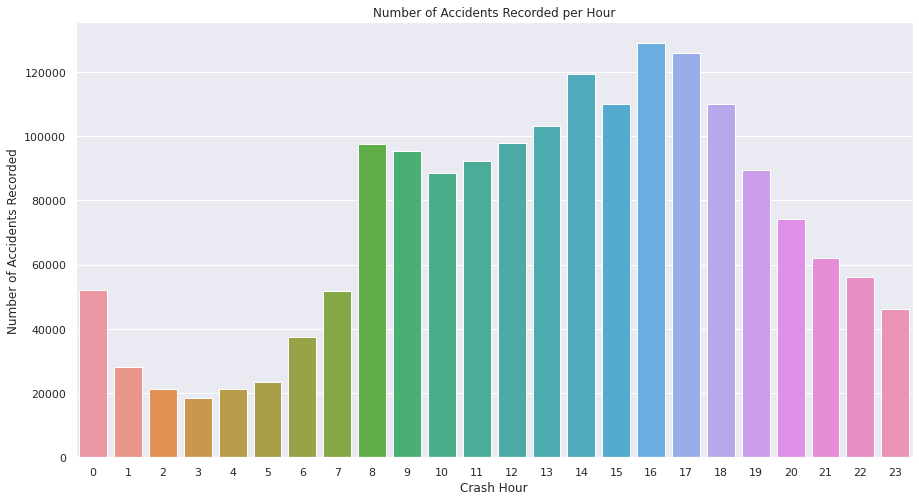

In [ ]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])
groupByHour_df = df.groupby(df['CRASH TIME'].dt.hour).count().rename(columns={'CRASH TIME':'Number of Accidents Recorded'})
groupByHour_df.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,8)})
fig = sns.barplot(x='CRASH TIME', y='Number of Accidents Recorded', data=groupByHour_df)
plt.xlabel("Crash Hour")
plt.title("Number of Accidents Recorded per Hour")
plt.show(fig)

## **Visualising Number of Accidents Recorded at each Borough**

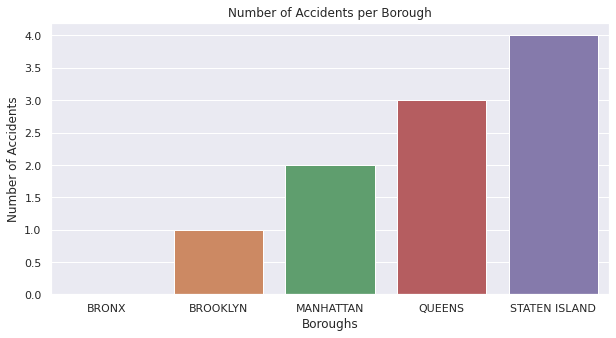

In [ ]:
groupByBorough_df = df.groupby(df['BOROUGH']).count()
groupByBorough_df.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(10,5)})
fig = sns.barplot(x='BOROUGH', y=groupByBorough_df.index, data=groupByBorough_df)
plt.xlabel("Boroughs")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Borough")
plt.show(fig)

In [ ]:
# groupByBoroughZip_df = df.groupby(['BOROUGH', 'ZIP CODE']).count().reset_index()
# pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])
# data = pd.melt(groupByBoroughZip_df, ['BOROUGH'], value_name=['COLLISION_ID'])
# ax=sns.barplot(x='BOROUGH', y='COLLISION_ID', hue='ZIP CODE', data=data)

# df['ZIP CODE'] = df[pd.to_numeric(df['ZIP CODE'], errors='coerce').isnull()]

# sns.set(rc={'figure.figsize':(25,7)})
# BRONX_df = groupByBoroughZip_df[groupByBoroughZip_df.BOROUGH == "BRONX"]
# BROOKLYN_df = groupByBoroughZip_df[groupByBoroughZip_df.BOROUGH == "BROOKLYN"]

# g, axs = plt.subplots(ncols=2)
# sns.barplot(x='ZIP CODE', y=BRONX_df.index, data=BRONX_df, ax=axs[0])
# loc, labels = plt.xticks()
# fig.set_xticklabels(labels, rotation=45)
# axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
# sns.barplot(x='ZIP CODE', y=BROOKLYN_df.index, data=BROOKLYN_df, ax=axs[1])
# axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
# print("")

## **Average number of accidents per borough:**

In [ ]:
NumberOfBoroughs = df['BOROUGH'].nunique()
AverageAccidentsPerBorough = NumberOfAccidents/NumberOfBoroughs

print("Average accidents per borough: {}".format(AverageAccidentsPerBorough))

Average accidents per borough: 348932.2


## **Plotting trend of accidents across years:**

Text(0.5, 1.0, 'Comparison of Number Pedastrians and Cyclists Killed in a Month')

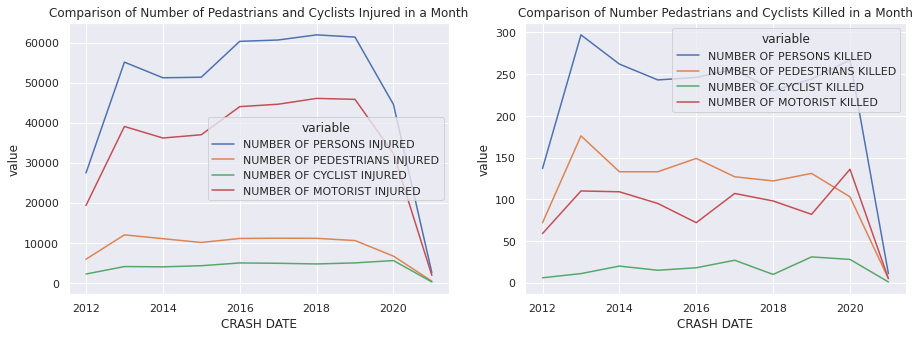

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
groupByYear_df = df.groupby(df['CRASH DATE'].dt.year).sum()
groupByYear_df.reset_index(inplace=True)

hue_columns = [
               'NUMBER OF PERSONS INJURED',
               'NUMBER OF PERSONS KILLED',
               'NUMBER OF PEDESTRIANS INJURED',
               'NUMBER OF PEDESTRIANS KILLED',
               'NUMBER OF CYCLIST INJURED',
               'NUMBER OF CYCLIST KILLED',
               'NUMBER OF MOTORIST INJURED',
               'NUMBER OF MOTORIST KILLED'
               ]

sns.set(rc={'figure.figsize':(15,5)})

plt.subplot(1, 2, 1)
sns.lineplot(x='CRASH DATE', y='value', hue='variable', 
              data=pd.melt(groupByYear_df, ['CRASH DATE'], hue_columns[::2]))
plt.title("Comparison of Number of Pedastrians and Cyclists Injured in a Year")
plt.subplot(1, 2, 2)
sns.lineplot(x='CRASH DATE', y='value', hue='variable', 
             data=pd.melt(groupByYear_df, ['CRASH DATE'], hue_columns[1::2]))
plt.title("Comparison of Number Pedastrians and Cyclists Killed in a Year")

## **Plotting trend of accidents across months:**

Text(0.5, 1.0, 'Comparison of Number Pedastrians and Cyclists Killed in a Month')

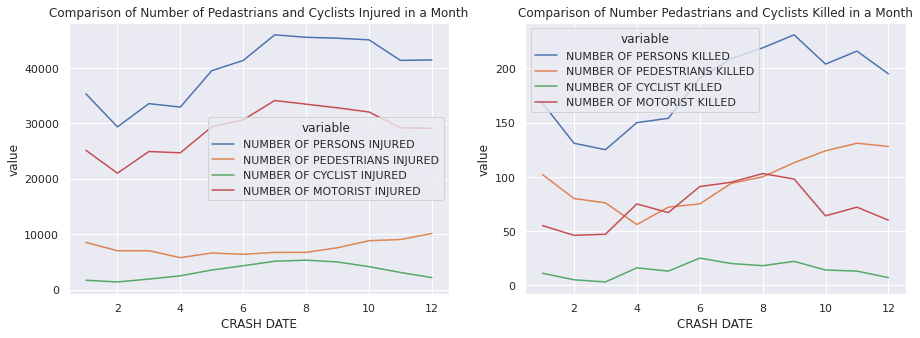

In [ ]:
groupByMonth_df = df.groupby(df['CRASH DATE'].dt.month).sum()
groupByMonth_df.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,5)})

plt.subplot(1, 2, 1)
sns.lineplot(x='CRASH DATE', y='value', hue='variable', 
              data=pd.melt(groupByMonth_df, ['CRASH DATE'], hue_columns[::2]))
plt.title("Comparison of Number of Pedastrians and Cyclists Injured in a Month")

plt.subplot(1, 2, 2)
sns.lineplot(x='CRASH DATE', y='value', hue='variable', 
             data=pd.melt(groupByMonth_df, ['CRASH DATE'], hue_columns[1::2]))
plt.title("Comparison of Number Pedastrians and Cyclists Killed in a Month")

In [ ]:
street_map = gpd.read_file(root + "/ny_map/tl_2019_36_cousub.shp")
# street_map = gpd.read_file(root + "/Streets_shp/StreetSegment.shp")

## **Plotting accidents on New York Map:**



/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


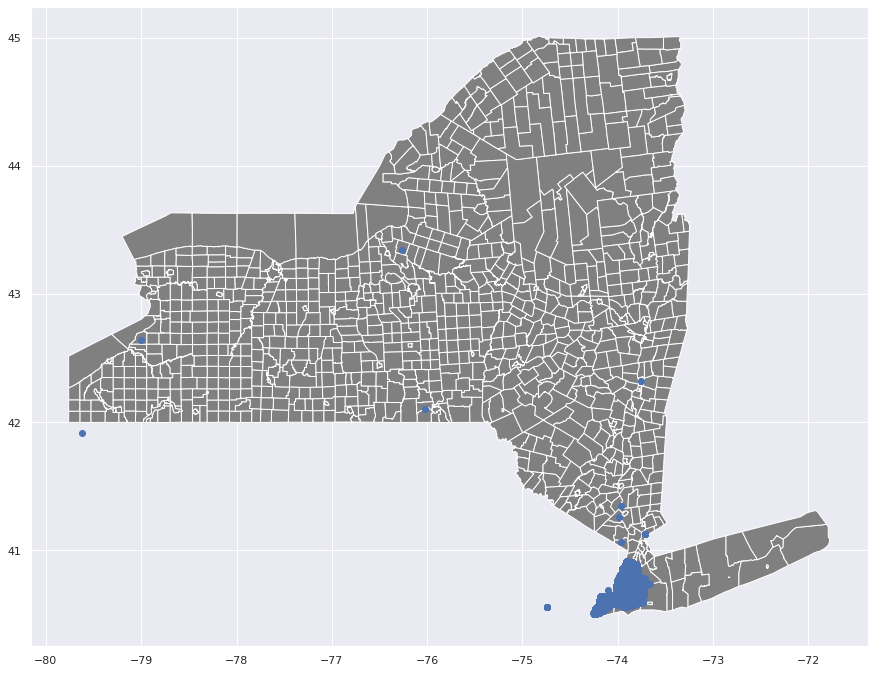

In [ ]:
crs = {'init': 'epsg:4326'}
g_df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
g_df = g_df[(-80.0 < g_df['LONGITUDE']) & (g_df['LONGITUDE'] < -70.0)]
g_df = g_df[(40.0 < g_df['LATITUDE']) & (g_df['LATITUDE'] < 45.0)]
# g_df.isnull().sum()
gmt = []
for lat,long in zip(g_df.LATITUDE, g_df.LONGITUDE):
    gmt.append(Point(long, lat))

geo_df = gpd.GeoDataFrame(g_df, crs=crs, geometry=gmt)
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax = ax)
street_map.plot(ax=ax, color="grey")
geo_df.plot(ax=ax)

## **Zooming up on accidents in New York City:**

(40.4, 41.0)

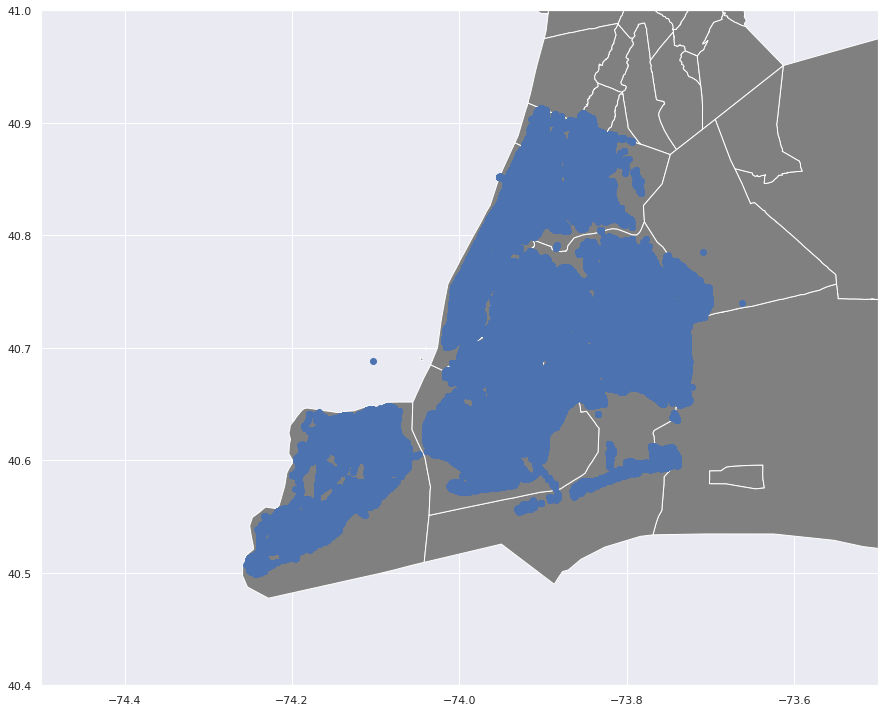

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, color="grey")
geo_df.plot(ax=ax)
plt.xlim([-74.5, -73.5])
plt.ylim([40.4, 41])

### **Most common contributing factors to accidents in NYC**

In [ ]:
# Focusing on CONTRIBUTING FACTOR VEHICLE 1 because only negligible values of vehicle 2-5 are not unspecified 

groupByCF_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified'].groupby(df['CONTRIBUTING FACTOR VEHICLE 1'])['CONTRIBUTING FACTOR VEHICLE 1'].count()
groupByCF_df['count'] = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified'].groupby(df['CONTRIBUTING FACTOR VEHICLE 1'])['CONTRIBUTING FACTOR VEHICLE 1'].count()
groupByCF_df_count = groupByCF_df['count'].sort_values(ascending=False)

print("Top 10 contributing factors for accidents:")
groupByCF_df_count.head(10)

Top 10 contributing factors for accidents:


CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction    300376
Failure to Yield Right-of-Way      91354
Following Too Closely              77904
Backing Unsafely                   60617
Other Vehicular                    48730
Passing or Lane Usage Improper     39100
Turning Improperly                 37420
Fatigued/Drowsy                    37361
Passing Too Closely                37187
Unsafe Lane Changing               29505
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 20 accident contributing factors in NYC')

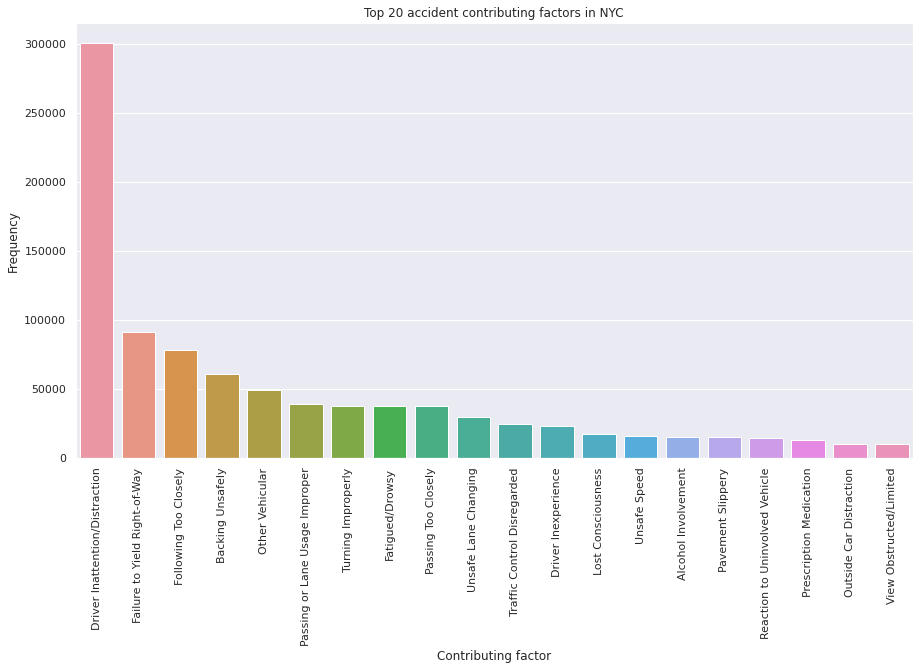

In [ ]:
plot = sns.barplot(groupByCF_df_count.iloc[:20].index, groupByCF_df_count.iloc[:20].values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.ylabel("Frequency")
plt.xlabel("Contributing factor")
plt.title("Top 20 accident contributing factors in NYC")

## **Contributing factors leading to the most damage (deaths and injuries)**

In [ ]:
groupByCF_df_sum = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified'].groupby(df['CONTRIBUTING FACTOR VEHICLE 1']).sum()

In [ ]:
TopCF_Kills = groupByCF_df_sum['NUMBER OF PERSONS KILLED'].sort_values(ascending=False)

print("Top 10 contributing factors causing the most kills:")
TopCF_Kills.head(10)

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           222.0
Unsafe Speed                                             189.0
Failure to Yield Right-of-Way                            183.0
Traffic Control Disregarded                              177.0
Alcohol Involvement                                       60.0
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     59.0
Illnes                                                    43.0
Passenger Distraction                                     42.0
Backing Unsafely                                          34.0
Driver Inexperience                                       32.0
Name: NUMBER OF PERSONS KILLED, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 20 accident factors leading to death in NYC')

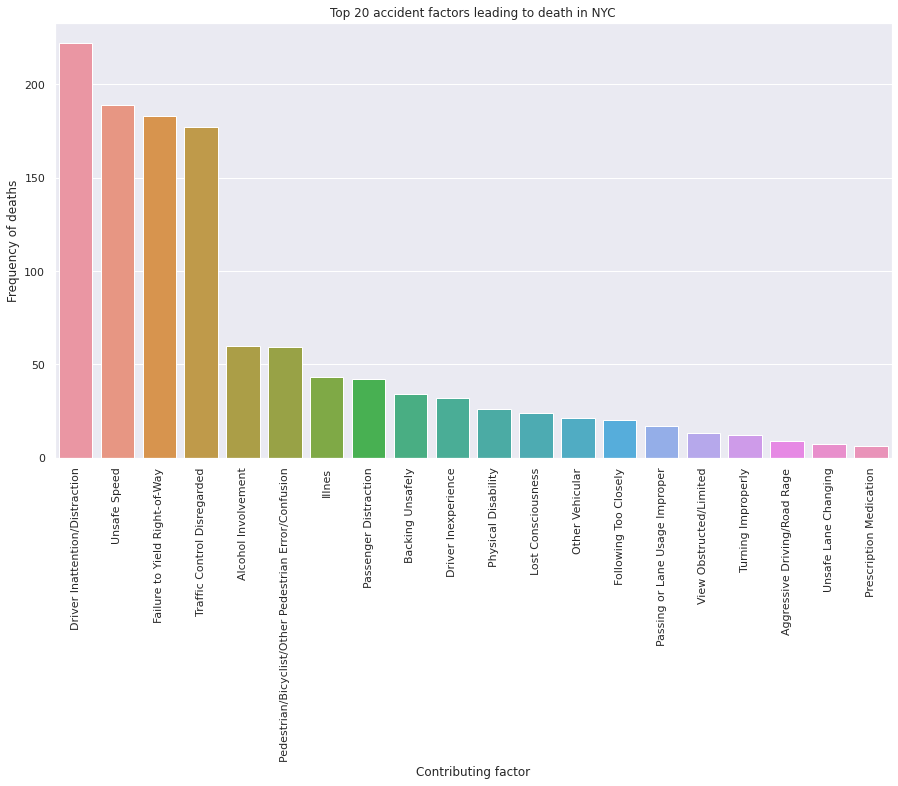

In [ ]:
plot = sns.barplot(TopCF_Kills.iloc[:20].index, TopCF_Kills.iloc[:20].values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.ylabel("Frequency of deaths")
plt.xlabel("Contributing factor")
plt.title("Top 20 accident factors leading to death in NYC")

In [ ]:
TopCF_Injuries = groupByCF_df_sum['NUMBER OF PERSONS INJURED'].sort_values(ascending=False)
print("Top 10 contributing factors causing the most injuries:")
TopCF_Injuries.head(10)

Top 10 contributing factors causing the most injuries:


CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction    85904.0
Failure to Yield Right-of-Way     41194.0
Following Too Closely             25881.0
Traffic Control Disregarded       15498.0
Other Vehicular                   10560.0
Unsafe Speed                       9775.0
Fatigued/Drowsy                    9397.0
Alcohol Involvement                7040.0
Turning Improperly                 6737.0
Backing Unsafely                   6362.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 20 accident factors leading to injuries in NYC')

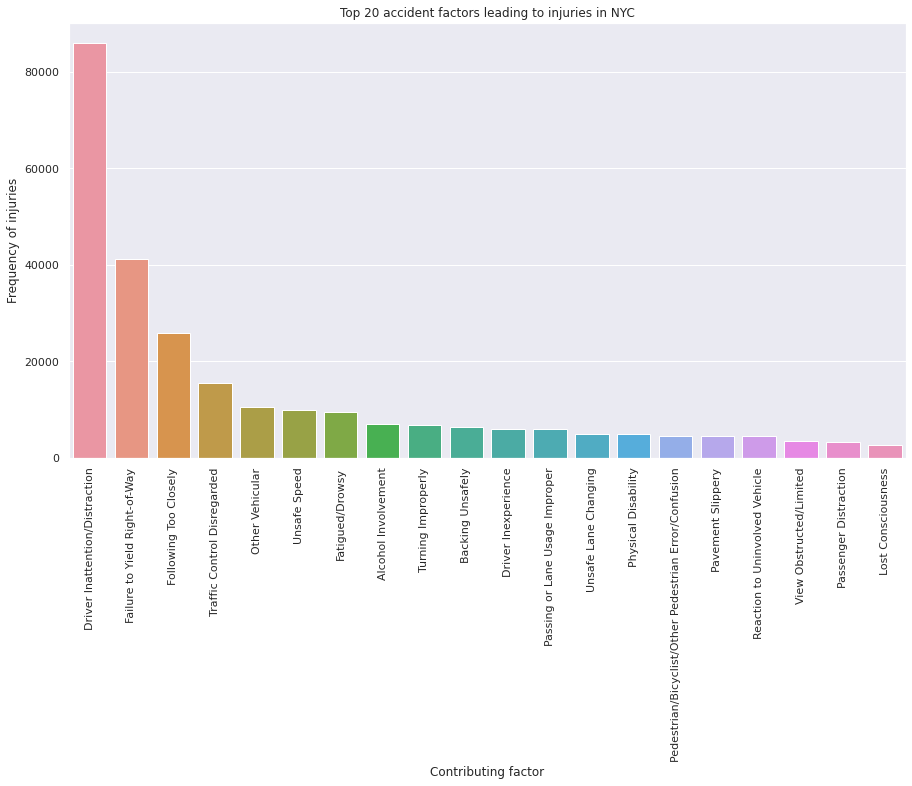

In [ ]:
plot = sns.barplot(TopCF_Injuries.iloc[:20].index, TopCF_Injuries.iloc[:20].values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.ylabel("Frequency of injuries")
plt.xlabel("Contributing factor")
plt.title("Top 20 accident factors leading to injuries in NYC")

### **Most common vehicles involved in accidents in NYC**

In [ ]:
# Focusing on Vehicles 1 and 2 since the others hardly show up in the records
Vehicles = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2']], axis=0)

# Removing unspecified and unknown values
Vehicles = Vehicles[(Vehicles!='unspecified') & (Vehicles!='unknown')]
Vehicle_counts = Vehicles.value_counts().sort_values(ascending=False)

print("Frequency of top 20 vehicles involved in accidents sorted in descending order:")
Vehicle_counts.head(20)

Frequency of top 20 vehicles involved in accidents sorted in descending order:


sedan                                  684878
passenger vehicle                      610221
station wagon/sport utility vehicle    548112
sport utility / station wagon          267615
taxi                                   125476
pick-up truck                           67317
van                                     54783
bus                                     49670
4 dr sedan                              49414
other                                   37831
box truck                               36886
bike                                    27666
small com veh(4 tires)                  22519
large com veh(6 or more tires)          22194
bicycle                                 17529
livery vehicle                          16401
motorcycle                              15262
tractor truck diesel                    13974
ambulance                                6743
dump                                     5427
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 20 vehicles involved in accidents in NYC')

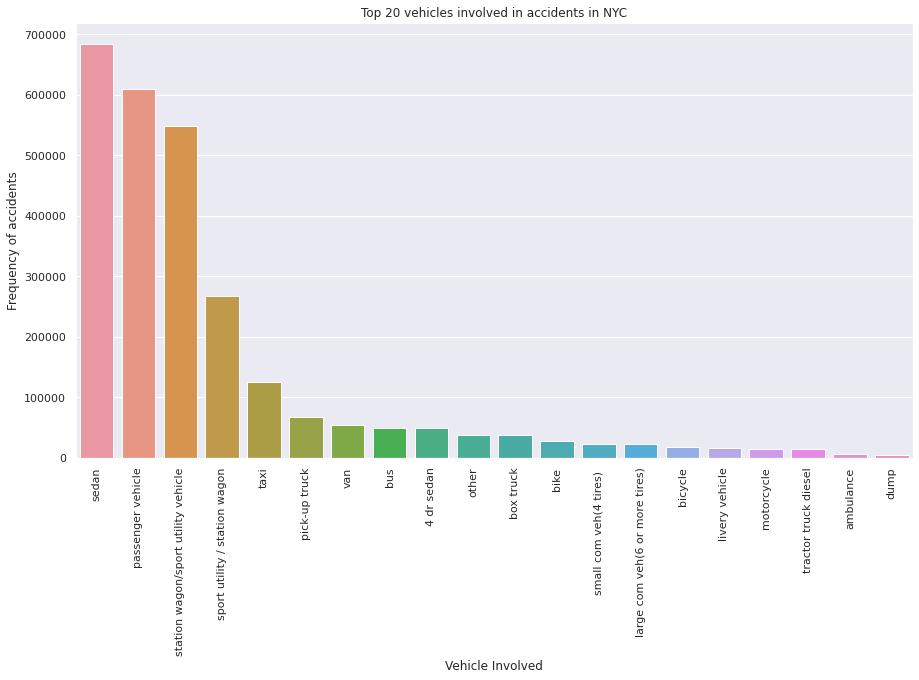

In [ ]:
plot = sns.barplot(Vehicle_counts.iloc[:20].index, Vehicle_counts.iloc[:20].values)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.ylabel("Frequency of accidents")
plt.xlabel("Vehicle Involved")
plt.title("Top 20 vehicles involved in accidents in NYC")